In [58]:
from sklearn.datasets import fetch_openml

In [59]:
mnist = fetch_openml('mnist_784', version= 1)

In [60]:
x,y = mnist.data, mnist['target']
x.shape

(70000, 784)

In [61]:
len(x)

70000

In [62]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [63]:
import matplotlib.pyplot as plt

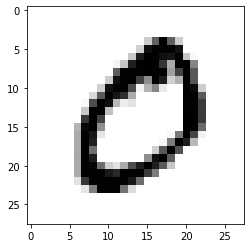

In [64]:
plt.imshow(x[1].reshape(-1,28), cmap= 'binary')
plt.show()

In [65]:
from sklearn.linear_model import SGDClassifier

In [66]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]
len(x_train)

60000

In [67]:
import numpy as np
np.random.seed(42)
shuffled_indices = np.random.permutation(60000)

In [68]:
len(shuffled_indices)

60000

In [69]:
shuffled_indices

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [70]:
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [71]:
y_train_5 = (y_train == '5')

In [72]:
len(y_train_5)

60000

In [73]:
sgd_clf_5 = SGDClassifier(random_state=42, max_iter= 10)

In [74]:
sgd_clf_5.fit(x_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [75]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)

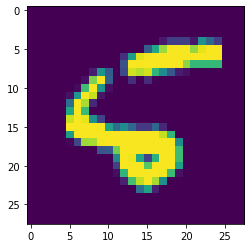

In [76]:
plt.imshow(x_test[8].reshape(28,28))

In [77]:
sgd_clf_5.predict(x_test[8:9])

array([False])

In [78]:
y_pred_ = sgd_clf_5.predict(x_train)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [80]:
accuracy = cross_val_score(sgd_clf_5,x_train,y_train_5,scoring = 'accuracy', cv = 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [81]:
accuracy.mean()

0.95945

In [82]:
from sklearn.model_selection import cross_val_predict
y_pred_cross = cross_val_predict(sgd_clf_5,x_train,y_train_5, cv= 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [83]:
from sklearn.metrics import classification_report

In [86]:
report = classification_report(y_train_5,y_pred_cross,output_dict = True)
report['True'], report['accuracy']

({'precision': 0.739423076923077,
  'recall': 0.8511344770337577,
  'f1-score': 0.7913558013892462,
  'support': 5421},
 0.95945)

# without cross val score

In [27]:
y_pred = sgd_clf_5.predict(x_train)
np.unique(y_pred)

array([False,  True])

In [28]:
report_sgd = classification_report(y_train_5,y_pred,output_dict=True)

In [29]:
report_sgd['True']

{'precision': 0.9399271844660194,
 'recall': 0.5714812765172478,
 'f1-score': 0.7107949982792247,
 'support': 5421}

In [30]:
sgd_clf_5.decision_function([x_train[99]])

array([-127271.64562544])

In [40]:
y_pred_cross = cross_val_predict(sgd_clf_5,x_train,y_train_5, cv= 3, method = 'decision_function')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [41]:
from sklearn.metrics import precision_recall_curve
pre, recal, threshold = precision_recall_curve(y_train_5, y_pred_cross)

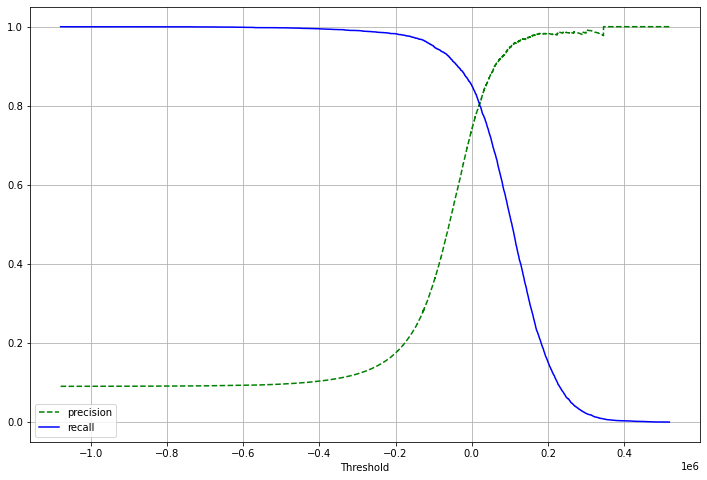

In [50]:
plt.figure(figsize = (12,8))
plt.plot(threshold,pre[:-1], 'g--' ,label = 'precision')
plt.plot(threshold,recal[:-1], 'b-' ,label = 'recall')
plt.legend()
plt.grid(True)
plt.xlabel('Threshold')
plt.show()

In [46]:
f1_score_manual = 2/((1/.81)+(1/.81))
f1_score_manual

0.81

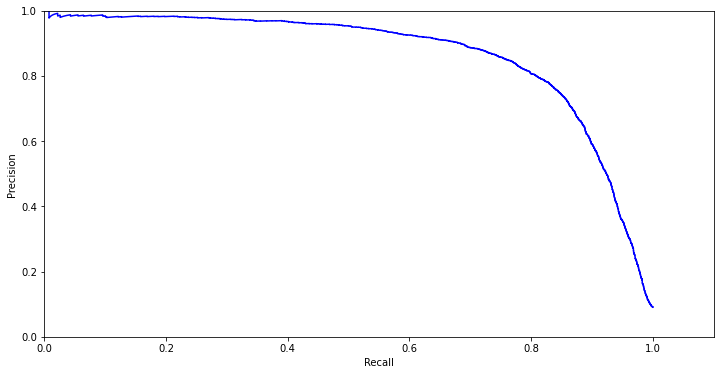

In [49]:
plt.figure(figsize = (12,6))
plt.plot(recal, pre, 'b-')
plt.xlabel("Recall")
plt.ylabel('Precision')
plt.axis([0,1.1,0,1])
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_train_5,y_pred_)

array([[54381,   198],
       [ 2323,  3098]], dtype=int64)

In [55]:
confusion_matrix(y_pred_,y_train_5)

array([[54381,  2323],
       [  198,  3098]], dtype=int64)

In [56]:
preci = 3098/(3098+198)
preci

0.9399271844660194

# Plotting Roc Curve

In [87]:
from sklearn.metrics import roc_curve

In [91]:
y_pred_score = sgd_clf_5.decision_function(x_train)

In [92]:
fpr,tpr, threshold_ = roc_curve(y_train_5, y_pred_score)

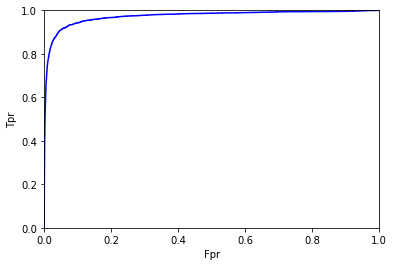

In [94]:
plt.plot(fpr,tpr,'b-')
plt.axis([0,1,0,1])
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.show()

In [95]:
from sklearn.metrics import roc_auc_score
au_roc_score = roc_auc_score(y_train_5,y_pred_score)
au_roc_score

0.9730641407240874

In [98]:
sgd_clf = SGDClassifier(random_state=42, max_iter= 10)

In [99]:
sgd_clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [115]:
n = 3
deci_score = sgd_clf.decision_function([x_test[n]])
deci_score

array([[ 143701.62900897, -371562.93501706, -213054.36241226,
        -138360.31676196, -384612.95101737, -356505.00572083,
         -68521.54812292, -123278.84666128, -289237.74498384,
        -146226.85178113]])

In [116]:
sgd_clf.predict([x_test[n]])

array(['0'], dtype='<U1')

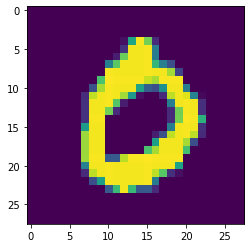

In [117]:
plt.imshow(x_test[n].reshape(28,28));